In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, log_loss, accuracy_score
from sklearn.preprocessing import  OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from tqdm import tqdm

In [3]:
sonar = pd.read_csv("C:/Python/Cases/Sonar/Sonar.csv")
le = LabelEncoder()
y = le.fit_transform( sonar['Class'] )
X = sonar.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [4]:
rf = RandomForestClassifier(random_state=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.66      0.97      0.79        34
           1       0.92      0.41      0.57        29

    accuracy                           0.71        63
   macro avg       0.79      0.69      0.68        63
weighted avg       0.78      0.71      0.69        63



In [8]:
features = [2,3,4,5,6,7,8,9,10]
scores = []
for f in features:
    rf = RandomForestClassifier(random_state=25, max_features=f)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append([f, accuracy_score(y_test, y_pred)] )
df_scores = pd.DataFrame( scores, columns=['features','score'] )
df_scores.sort_values('score', ascending=False)

,features,score
3,5,0.761905
1,3,0.746032
2,4,0.746032
4,6,0.730159
8,10,0.730159
0,2,0.714286
5,7,0.714286
6,8,0.714286
7,9,0.698413


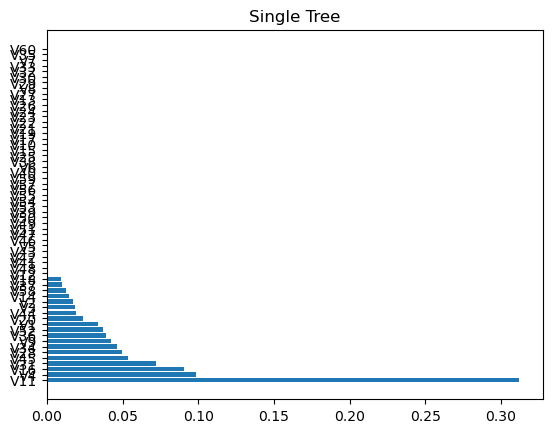

In [ ]:
dtc = DecisionTreeClassifier(random_state=25)
dtc.fit(X, y)
df_imp = pd.DataFrame({'features':list(X.columns), 'imp':dtc.feature_importances_})
df_imp = df_imp.sort_values('imp', ascending=False)
plt.barh(df_imp['features'], df_imp['imp'])
plt.title("Single Tree")
plt.show()

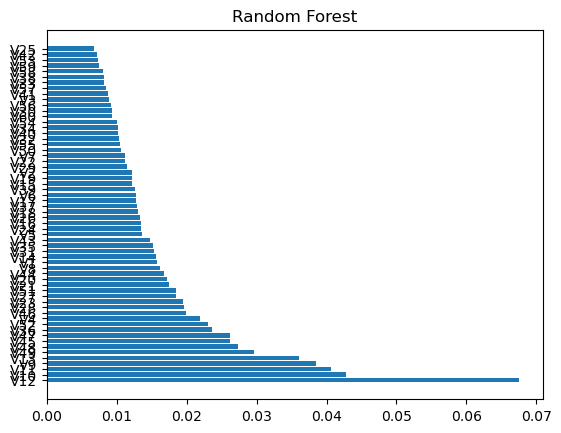

In [ ]:
rf = RandomForestClassifier(random_state=25, max_features=5)
rf.fit(X, y)
df_imp = pd.DataFrame({'features':list(X.columns),  'imp':rf.feature_importances_})
df_imp = df_imp.sort_values('imp', ascending=False)
plt.barh(df_imp['features'], df_imp['imp'])
plt.title("Random Forest")
plt.show()